In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,f1_score


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
!pip install xgboost
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv('new_task.csv', encoding='ISO-8859-1')
df.head()

,News_Headline,Link_Of_News,Source,Stated_On,Date,Label
0,Says Osama bin Laden endorsed Joe Biden,https://www.politifact.com/factchecks/2020/jun...,Donald Trump Jr.,"June 18, 2020","June 19, 2020",FALSE
1,CNN aired a video of a toddler running away fr...,https://www.politifact.com/factchecks/2020/jun...,Donald Trump,"June 18, 2020","June 19, 2020",pants-fire
2,Says Tim Tebow kneeled in protest of abortion...,https://www.politifact.com/factchecks/2020/jun...,Facebook posts,"June 12, 2020","June 19, 2020",FALSE
3,Even so-called moderate Democrats like Joe Bi...,https://www.politifact.com/factchecks/2020/jun...,Paul Junge,"June 10, 2020","June 19, 2020",barely-true
4,"""Our health department, our city and our count...",https://www.politifact.com/factchecks/2020/jun...,Jeanette Kowalik,"June 14, 2020","June 18, 2020",TRUE


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9960 entries, 0 to 9959
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   News_Headline  9960 non-null   object
 1   Link_Of_News   9960 non-null   object
 2   Source         9960 non-null   object
 3   Stated_On      9960 non-null   object
 4   Date           9960 non-null   object
 5   Label          9960 non-null   object
dtypes: object(6)
memory usage: 467.0+ KB
None
News_Headline    0
Link_Of_News     0
Source           0
Stated_On        0
Date             0
Label            0
dtype: int64


C:\Users\chakr\AppData\Local\Temp\ipykernel_20072\807626289.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Label', data=df, order=df['Label'].value_counts().index, palette='viridis')


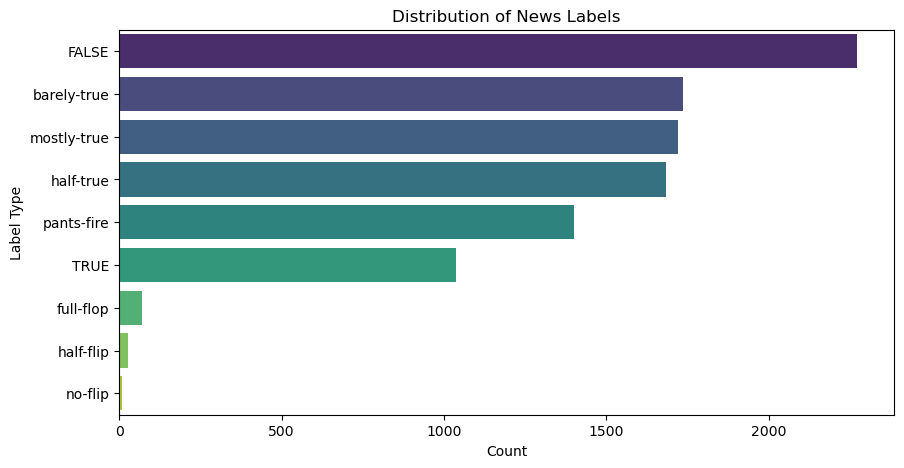

In [4]:
#EDA
print(df.info())
print(df.isnull().sum())


plt.figure(figsize=(10, 5))
sns.countplot(y='Label', data=df, order=df['Label'].value_counts().index, palette='viridis')
plt.title('Distribution of News Labels')
plt.xlabel('Count')
plt.ylabel('Label Type')
plt.show()


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9960 entries, 0 to 9959
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   News_Headline  9960 non-null   object
 1   Link_Of_News   9960 non-null   object
 2   Source         9960 non-null   object
 3   Stated_On      9960 non-null   object
 4   Date           9960 non-null   object
 5   Label          9960 non-null   object
dtypes: object(6)
memory usage: 467.0+ KB


In [6]:
df=df.drop(['Stated_On','Date'], axis=1)
df=df.drop(['Link_Of_News'],axis=1)

In [7]:
df.head()

,News_Headline,Source,Label
0,Says Osama bin Laden endorsed Joe Biden,Donald Trump Jr.,FALSE
1,CNN aired a video of a toddler running away fr...,Donald Trump,pants-fire
2,Says Tim Tebow kneeled in protest of abortion...,Facebook posts,FALSE
3,Even so-called moderate Democrats like Joe Bi...,Paul Junge,barely-true
4,"""Our health department, our city and our count...",Jeanette Kowalik,TRUE


In [13]:
def clean_text(text):
    #remove_puntuation
    text = re.sub(r'[^\w\s]', '', text) 
    return text

# Apply cleaning to headlines
df['Cleaned_Headline'] = df['News_Headline'].apply(clean_text)

# Feature Extraction: Convert text to numbers using TF-IDF
# We limit to the top 5,000 most frequent words
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df['Cleaned_Headline'])

X.shape

(9960, 5000)

In [9]:
df.head()
df = df.dropna(subset=['News_Headline', 'Label'])

In [14]:
def train_and_evaluate(X, y, multi_class):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Naive Bayes": MultinomialNB(),
        "Random Forest": RandomForestClassifier(n_estimators=100),
        "Decision Tree": DecisionTreeClassifier(),
        "KNN": KNeighborsClassifier(),
        "SVM": SVC(),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    }
    
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc
        print(f"{name}: {acc:.4f}")
    results_df = pd.DataFrame(list(results.items()), columns=['ML Algorithm', 'Accuracy'])
    results_df = results_df.sort_values(by='Accuracy', ascending=False)
    
    # Visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Accuracy', y='ML Algorithm', data=results_df, palette='viridis')
    plt.title(f'Accuracy: {multi_class}')
    plt.xlim(0, 1.0)
    for index, value in enumerate(results_df['Accuracy']):
        plt.text(value, index, f'{value:.2f}', va='center')
        
    plt.tight_layout()
    plt.show()
    
    return results_df

In [11]:
le = LabelEncoder()
y_multiclass = le.fit_transform(df['Label'])

Predicting Original Multiclass Labels...
Logistic Regression: 0.2915
Naive Bayes: 0.2774
Random Forest: 0.2691
Decision Tree: 0.2299
KNN: 0.2450
SVM: 0.2875


C:\Ananconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:27:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: 0.2570


C:\Users\chakr\AppData\Local\Temp\ipykernel_20072\2175919621.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='ML Algorithm', data=results_df, palette='viridis')


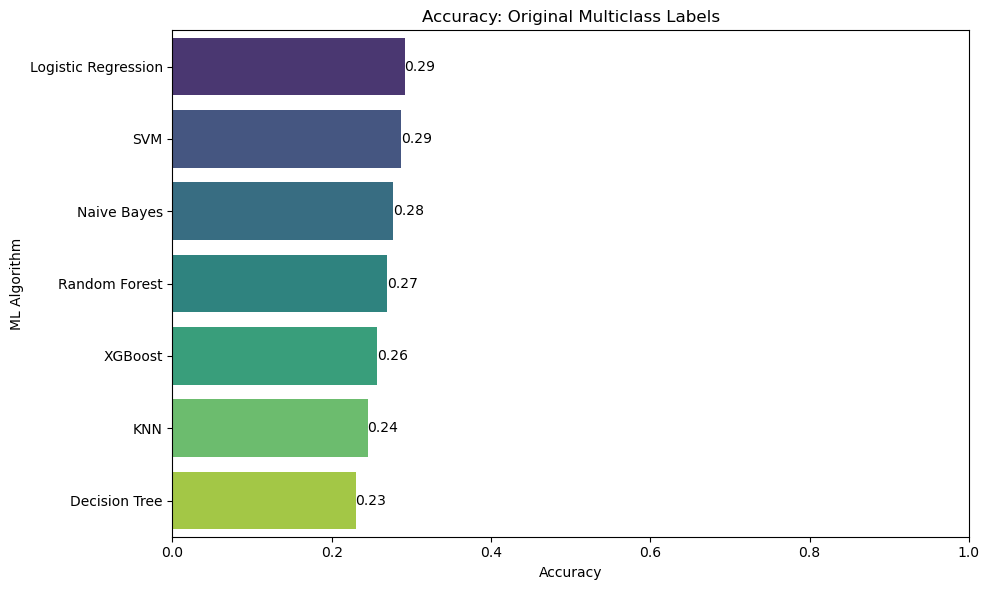

,ML Algorithm,Accuracy
0,Logistic Regression,0.291499
5,SVM,0.287483
1,Naive Bayes,0.277443
2,Random Forest,0.269076
6,XGBoost,0.257028
4,KNN,0.244980
3,Decision Tree,0.229920


In [15]:
print("Predicting Original Multiclass Labels...")
train_and_evaluate(X, y_multiclass, "Original Multiclass Labels")